In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.stats import norm
from numpy import *
from qutip import *

In [2]:
N = 50

wr = 7.0 * 2 * pi
wq1 = 5.0 * 2 * pi

g1 = 0.1 * 2 * pi

chi1 = g1**2 / abs(wr-wq1)

wd1 = wq1

Dr1 = wr-wd1
Dq1 = wq1-wd1

In [3]:
tlist = np.linspace(0, 10, 5000)

In [4]:
# cavity operators
a = tensor(destroy(N), qeye(2))
n = a.dag() * a

# operators for qubit 1
sm1 = tensor(qeye(N), destroy(2))
sz1 = tensor(qeye(N), sigmaz())
sx1 = tensor(qeye(N), sigmax())
sy1 = tensor(qeye(N), sigmay())
n1 = sm1.dag() * sm1

In [5]:
Hsyst = Dr1*n + Dq1*sz1/2

In [6]:
Hsyst

Quantum object: dims = [[50, 2], [50, 2]], shape = (100, 100), type = oper, isherm = True
Qobj data =
[[   0.            0.            0.         ...,    0.            0.            0.        ]
 [   0.            0.            0.         ...,    0.            0.            0.        ]
 [   0.            0.           12.56637061 ...,    0.            0.            0.        ]
 ..., 
 [   0.            0.            0.         ...,  603.18578949    0.            0.        ]
 [   0.            0.            0.         ...,    0.          615.7521601
     0.        ]
 [   0.            0.            0.         ...,    0.            0.
   615.7521601 ]]

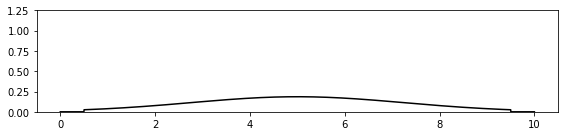

In [7]:
def gaussianpulse(x,m):
    s = 2.25
    return (np.heaviside(x-m+2*s,1)-np.heaviside(x-m-2*s,1))*norm.pdf(x, loc = m, scale = s)/0.9544997361

def squarepulse(x,m):
    return (np.heaviside(x-m+4.5,1)-np.heaviside(x-m-4.5,1))/9

fig, axes = plt.subplots(1, 1, figsize=(8,2))
axes.plot(tlist, [gaussianpulse(t,5) + squarepulse(t,15) for t in tlist], 'k')
axes.set_ylim(0, 1.25)
fig.tight_layout()

In [8]:
def ksi1_t(t, args=None):
    return pi *(gaussianpulse(t,5)*abs(1))

def ksi1_t1(t, args=None):
    return (0.5*Dr1/g1) * pi *(squarepulse(t,5)*(1)) * exp(-1j*wd1*(t-0.5))

def ksi1_t2(t, args=None):
    return (0.5*Dr1/g1) * pi *(squarepulse(t,5)*(1)) * exp(1j*wd1*(t-0.5))

def ksi2_t(t, args=None):
    return 0 * pi *(squarepulse(t,15)*abs(1))* cos(wd2*(t-10.5))

def ksi2_t1(t, args=None):
    return 0 * pi *(squarepulse(t,15)*(1)) * exp(-1j*wd2*(t-10.5))

def ksi2_t2(t, args=None):
    return 0 * pi *(squarepulse(t,15)*(1)) * exp(1j*wd2*(t-10.5))

def ksi3_t(t, args=None):
    return 0*(gaussianpulse(t,5)*(1))

def ksi3_t1(t, args=None):
    return 0*(gaussianpulse(t,5)*(1)) * exp(-1j*wd3*t)

def ksi3_t2(t, args=None):
    return 0*(gaussianpulse(t,5)*(1)) * exp(1j*wd3*t)

In [9]:
psi0 = tensor(basis(N,0),basis(2,0))
H_t = [[sx1/2, ksi1_t], Hsyst]

In [10]:
res = mesolve(H_t, psi0, tlist, [], [])

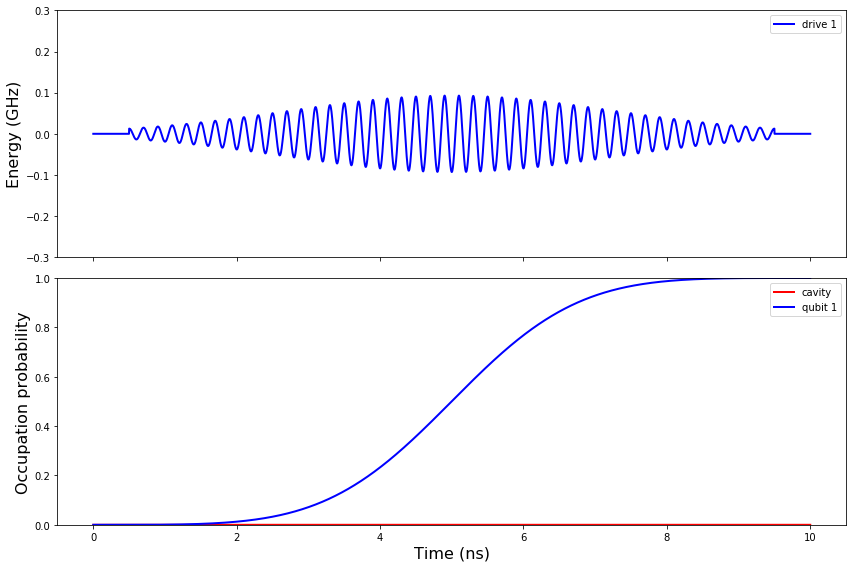

In [12]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12,8))

axes[0].plot(tlist, array(list(map(ksi1_t, tlist)))*cos(wd1*(tlist-0.5)) / (2*pi), 'b', linewidth=2, label="drive 1")
#axes[0].plot(tlist, array(list(map(ksi2_t, tlist))) / (2*pi), 'g', linewidth=2, label="drive 2")
#axes[0].plot(tlist, array(list(map(ksi3_t, tlist))) / (2*pi), 'r', linewidth=2, label="drive 3")
axes[0].set_ylim(-0.3, 0.3)
axes[0].set_ylabel("Energy (GHz)", fontsize=16)
axes[0].legend()

axes[1].plot(tlist, real(expect(n, res.states)), 'r', linewidth=2, label="cavity")
axes[1].plot(tlist, real(expect(n1, res.states)), 'b', linewidth=2, label="qubit 1")
#axes[1].plot(tlist, real(expect(n2, res.states)), 'g', linewidth=2, label="qubit 2")
axes[1].set_ylim(0, 1)

axes[1].set_xlabel("Time (ns)", fontsize=16)
axes[1].set_ylabel("Occupation probability", fontsize=16)
axes[1].legend()

fig.tight_layout()

In [64]:
# extract the final state from the result of the simulation
rho_final = res.states[-1]

In [66]:
# trace out the resonator mode and print the two-qubit density matrix
rho_qubits = ptrace(rho_final, 1)
rho_qubits

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[  9.78495763e-10 +0.00000000e+00j   0.00000000e+00 +3.12809169e-05j]
 [  0.00000000e+00 -3.12809169e-05j   9.99999999e-01 +0.00000000e+00j]]

In [68]:
# compare to the ideal result of the sqrtiswap gate (plus phase correction) for the current initial state
rho_qubits_ideal = ket2dm(basis(2,1))
rho_qubits_ideal

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.  0.]
 [ 0.  1.]]